In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cd='/content/drive/My Drive/Colab Notebooks/'
%cd /content/drive/My Drive/Colab Notebooks/
import numpy as np
import os, cv2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [ ]:
data_path = '/content/drive/MyDrive/Colab Notebooks/CK+48'
data_dir_list = os.listdir(data_path)
img_data_list=[]
labels_list=[]
class_value=0 #i is the label 
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        # Using 0 to read image in grayscale mode
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img, 0 )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        #input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img)
        labels_list.append(class_value)
    class_value+=1
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/np.amax(img_data)#normalize data by dividing each pixel value by the maximum
img_data.shape #The dataset contains 750 images, each image is a 2D shape 48x48

Loaded the images of dataset-surprise

Loaded the images of dataset-anger

Loaded the images of dataset-sadness

Loaded the images of dataset-fear

Loaded the images of dataset-happy



(750, 48, 48)

In [ ]:
labels = np.array(labels_list)
labels = labels.astype('int32')
print(labels.shape)

(750,)


In [ ]:
pip install pygad>=2.8.0

In [ ]:
import pygad
import tensorflow
# Keras Models
import keras 
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.datasets import mnist

# Aditional Libs
import numpy
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


**Keras Model**

In [ ]:
input_layer  = Input(48*48)
hidden_layer1 =Dense(256, activation="relu")(input_layer)
output_layer = Dense(5, activation="softmax")(hidden_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2304)]            0         
                                                                 
 dense (Dense)               (None, 256)               590080    
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 591,365
Trainable params: 591,365
Non-trainable params: 0
_________________________________________________________________


**Instantiate the kerasGA class**

In [ ]:
import pygad.kerasga

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

**Fitness function**

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into two subsets (70%-30%). 
data_inputs,x_test, data_outputs , y_test = train_test_split(img_data, labels, test_size=0.3, shuffle=True, random_state=3)
#reshape your input to 1D 
data_inputs=numpy.reshape(data_inputs, newshape=(data_inputs.shape[0],-1))
data_inputs.shape, data_outputs.shape
x_test=numpy.reshape(x_test, newshape=(x_test.shape[0],-1))


In [ ]:
data_inputs = data_inputs.astype('float32')
x_test = x_test.astype('float32')
data_inputs /= 255
x_test /= 255

data_outputs = to_categorical(data_outputs, 5)
y_test = to_categorical(y_test, 5)

In [ ]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model
    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

In [ ]:
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

**Instantiate the pygad.GA class**

In [ ]:
num_generations = 200
num_parents_mating =5
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations, 
                       num_parents_mating=num_parents_mating, 
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)

**Run the GA**

In [ ]:
ga_instance.run()

Generation = 1
Fitness    = 0.6212075574397123
Generation = 2
Fitness    = 0.6212075574397123
Generation = 3
Fitness    = 0.6212075574397123
Generation = 4
Fitness    = 0.6212075574397123
Generation = 5
Fitness    = 0.6282035420160778
Generation = 6
Fitness    = 0.6287394146639553
Generation = 7
Fitness    = 0.6438938065164326
Generation = 8
Fitness    = 0.6438938065164326
Generation = 9
Fitness    = 0.6473176804386145
Generation = 10
Fitness    = 0.6473176804386145
Generation = 11
Fitness    = 0.6473176804386145
Generation = 12
Fitness    = 0.6473176804386145
Generation = 13
Fitness    = 0.6473176804386145
Generation = 14
Fitness    = 0.6473176804386145
Generation = 15
Fitness    = 0.6473176804386145
Generation = 16
Fitness    = 0.6473176804386145
Generation = 17
Fitness    = 0.6473176804386145
Generation = 18
Fitness    = 0.6473176804386145
Generation = 19
Fitness    = 0.6536498332735453
Generation = 20
Fitness    = 0.6536498332735453
Generation = 21
Fitness    = 0.6536498332735453
G

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:3135: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


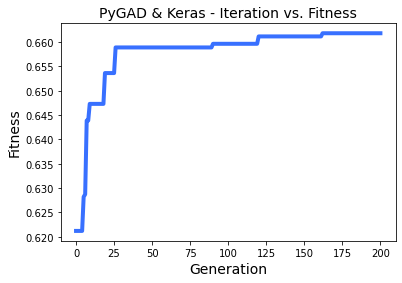

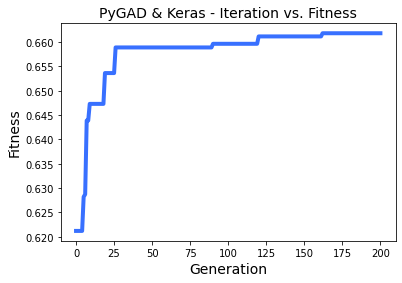

In [ ]:
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [ ]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

Fitness value of the best solution = 0.6618347561050799
Index of the best solution : 0


In [ ]:
# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions : \n", predictions)

Predictions : 
 [[0.31732282 0.15211262 0.1110511  0.09780893 0.32170457]
 [0.34075645 0.11785249 0.12750217 0.08691484 0.326974  ]
 [0.29093298 0.14399323 0.10338915 0.09352844 0.3681562 ]
 ...
 [0.30320495 0.14917764 0.10008746 0.09268676 0.35484314]
 [0.37758252 0.13250144 0.09072649 0.09780654 0.30138308]
 [0.30754134 0.16717866 0.09971723 0.11013441 0.3154284 ]]


In [ ]:
# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Categorical Crossentropy : ", cce(data_outputs, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.CategoricalAccuracy()
ca.update_state(data_outputs, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

Categorical Crossentropy :  1.5109512
Accuracy :  0.29333332
